# Disney Analsyis: The Basics
To begin looking at how gender affects dialogue in these movies let's get some basic stats first. Specifically:
* Token count per line
* Type count per line

How do these vary based on gender? Later on I hope to look at these character by character:
* Token count per character
* Type counter per character
* TTR per character

I'm not doing TTR line by line, because some of these lines are incredibly short, creating huge TTRs. It's best to look at a character's overall TTR

## 1) Token count

In [1]:
import nltk

In [2]:
import pandas as pd

In [3]:
disney_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_disney_annotated.pkl")

In [4]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 10 columns):
Disney_Period       7422 non-null object
Gender              7422 non-null object
Movie               7422 non-null object
Role                7422 non-null object
Song                7422 non-null object
Speaker             7422 non-null object
Speaker_Status      7422 non-null object
Text                7422 non-null object
UTTERANCE_NUMBER    7422 non-null int64
Year                7422 non-null int64
dtypes: int64(2), object(8)
memory usage: 347.9+ KB


In [5]:
disney_df["Tokens"] = disney_df.Text.map(nltk.word_tokenize)

In [6]:
disney_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th..."
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]"
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the..."
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h..."
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]"


In [7]:
disney_df["Types"] = disney_df.Tokens.map(set)

In [8]:
disney_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{the, come, face, thee, darkness, i, through, ..."
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{thou, what, ,, ?, queen, know, my, wouldst}"
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{wall, the, ,, fairest, on, ?, one, is, mirror..."
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{grace, more, fair, rags, hide, thee, can, i, ..."
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{., reveal, for, her, alas, name, !}"


In [9]:
disney_df["Token_Count"] = disney_df.Tokens.map(len)

In [10]:
disney_df["Type_Count"] = disney_df.Types.map(len)

In [11]:
disney_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{the, come, face, thee, darkness, i, through, ...",26,24
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{thou, what, ,, ?, queen, know, my, wouldst}",8,8
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{wall, the, ,, fairest, on, ?, one, is, mirror...",14,13
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{grace, more, fair, rags, hide, thee, can, i, ...",33,27
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{., reveal, for, her, alas, name, !}",8,7


A look at the overall averages...Looks like most lines are 14 tokens long, but with a very big standard deviation. The average type count per line is 11 tokens, again with a big standard deviation.

In [12]:
disney_df[["Token_Count", "Type_Count"]].describe()

,Token_Count,Type_Count
count,7422.000000,7422.000000
mean,14.005794,11.148612
std,21.246459,11.914911
min,0.000000,0.000000
25%,5.000000,4.000000
50%,9.000000,8.000000
75%,16.000000,14.000000
max,480.000000,181.000000


In [13]:
disney_df[disney_df.Token_Count == 0] #a blank line for flynn--indicates a silent response

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count
6335,LATE,m,Tangled,PRO,D,flynn,NON-P,,348,2010,[],{},0,0


In [14]:
disney_df[disney_df.Token_Count == 480]

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count
5751,LATE,m,Moana,PRO,S,maui,NON-P,"i see what's happening, yeah. you're face to f...",146,2016,"[i, see, what, 's, happening, ,, yeah, ., you,...","{nice, adorable, high, maui, stretch, boat, co...",480,179


The large standard deviation could be due to song lyrics being included. Let's create a new dataframe, with just dialogue.

In [15]:
disney_df_dialogue = disney_df[disney_df.Song == 'D']

In [16]:
disney_df_dialogue.reset_index(drop=True, inplace=True)

In [17]:
disney_df_dialogue.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{the, come, face, thee, darkness, i, through, ...",26,24
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{thou, what, ,, ?, queen, know, my, wouldst}",8,8
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{wall, the, ,, fairest, on, ?, one, is, mirror...",14,13
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{grace, more, fair, rags, hide, thee, can, i, ...",33,27
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{., reveal, for, her, alas, name, !}",8,7


In [18]:
print(disney_df.Movie.value_counts()) #lines in each movie w/ songs
print(disney_df_dialogue.Movie.value_counts()) #lines in each movie w/o songs

Frozen                       853
Aladdin                      842
Beauty and the Beast         770
The Princess and the Frog    675
Pocahontas                   638
Tangled                      581
Mulan                        554
Cinderella                   497
Sleeping Beauty              461
Brave                        411
The Little Mermaid           395
Moana                        382
Snow White                   363
Name: Movie, dtype: int64
Aladdin                      785
Frozen                       740
The Princess and the Frog    644
Beauty and the Beast         638
Pocahontas                   556
Tangled                      527
Mulan                        509
Cinderella                   475
Sleeping Beauty              434
Brave                        410
The Little Mermaid           377
Moana                        355
Snow White                   337
Name: Movie, dtype: int64


In [19]:
print(disney_df.Movie.value_counts().describe()) # shows average number of lines in each movie w/ songs
print(disney_df_dialogue.Movie.value_counts().describe()) # shows average number of line in each movie w/o songs

count     13.000000
mean     570.923077
std      173.540803
min      363.000000
25%      411.000000
50%      554.000000
75%      675.000000
max      853.000000
Name: Movie, dtype: float64
count     13.000000
mean     522.076923
std      144.919208
min      337.000000
25%      410.000000
50%      509.000000
75%      638.000000
max      785.000000
Name: Movie, dtype: float64


In [20]:
print(disney_df[["Token_Count", "Type_Count"]].describe()) #token/type counts in song df
print('\n')
print(disney_df_dialogue[["Token_Count", "Type_Count"]].describe()) #token/type counts in dialogue df

       Token_Count   Type_Count
count  7422.000000  7422.000000
mean     14.005794    11.148612
std      21.246459    11.914911
min       0.000000     0.000000
25%       5.000000     4.000000
50%       9.000000     8.000000
75%      16.000000    14.000000
max     480.000000   181.000000


       Token_Count   Type_Count
count  6787.000000  6787.000000
mean     12.482245    10.364520
std      14.433096     9.458817
min       0.000000     0.000000
25%       5.000000     4.000000
50%       8.000000     8.000000
75%      15.000000    13.000000
max     300.000000   140.000000


Now, the average token count is 12.5, and the average type count is 10. The standard deviations are also lower!

Let's look at the overall stats for each movie!

In [21]:
disney_df.groupby(['Year', 'Movie'], sort = 'False')[["Token_Count", "Type_Count"]].describe()

Token_Count                                  \
                                     count       mean        std  min  25%   
Year Movie                                                                   
1937 Snow White                      363.0  14.650138  16.265627  1.0  5.0   
1950 Cinderella                      497.0  14.082495  19.046294  1.0  4.0   
1959 Sleeping Beauty                 461.0  11.173536  12.625554  1.0  5.0   
1989 The Little Mermaid              395.0  19.860759  32.151740  2.0  6.0   
1991 Beauty and the Beast            770.0  11.811688  14.507686  2.0  5.0   
1992 Aladdin                         842.0  11.589074  11.038567  2.0  5.0   
1995 Pocahontas                      638.0  13.114420  20.592505  1.0  5.0   
1998 Mulan                           554.0  12.384477  14.876776  1.0  5.0   
2009 The Princess and the Frog       675.0  16.955556  24.156901  1.0  6.0   
2010 Tangled                         581.0  15.242685  24.085365  0.0  4.0   
2012 Brave                           411.0  12.381995  15.136858  2.0  5.0   
2013 Frozen                          853.0  12.572098  21.659411  1.0  4.0   
2016 Moana                           382.0  22.102094  41.327417  1.0  5.0   

                                                  Type_Count             \
                                 50%   75%    max      count       mean   
Year Movie                                                                
1937 Snow White                  9.0  17.5  121.0      363.0  11.016529   
1950 Cinderella                  9.0  16.0  220.0      497.0  10.981891   
1959 Sleeping Beauty             8.0  13.0  128.0      461.0   9.566161   
1989 The Little Mermaid         11.0  22.0  397.0      395.0  14.475949   
1991 Beauty and the Beast        9.0  15.0  290.0      770.0   9.925974   
1992 Aladdin                     8.0  15.0  144.0      842.0   9.966746   
1995 Pocahontas                  8.5  15.0  340.0      638.0  10.724138   
1998 Mulan                       8.0  15.0  188.0      554.0  10.485560   
2009 The Princess and the Frog  10.0  20.0  261.0      675.0  13.481481   
2010 Tangled                     8.0  17.0  257.0      581.0  11.845095   
2012 Brave                       9.0  15.0  190.0      411.0  10.072993   
2013 Frozen                      8.0  14.0  347.0      853.0   9.969519   
2016 Moana                      11.0  23.0  480.0      382.0  15.308901   

                                                                        
                                      std  min  25%   50%   75%    max  
Year Movie                                                              
1937 Snow White                  9.863698  1.0  5.0   8.0  13.5   68.0  
1950 Cinderella                 12.322681  1.0  4.0   7.0  13.0  132.0  
1959 Sleeping Beauty             8.701228  1.0  4.0   7.0  12.0   80.0  
1989 The Little Mermaid         17.409412  2.0  5.0   9.0  17.0  181.0  
1991 Beauty and the Beast        8.857841  2.0  5.0   8.0  13.0  138.0  
1992 Aladdin                     7.957457  2.0  5.0   8.0  13.0   93.0  
1995 Pocahontas                 11.311450  1.0  4.0   8.0  14.0  141.0  
1998 Mulan                       9.982660  1.0  4.0   8.0  13.0  106.0  
2009 The Princess and the Frog  13.532603  1.0  5.0   9.0  17.0  108.0  
2010 Tangled                    13.928021  0.0  3.0   8.0  15.0  134.0  
2012 Brave                       9.209726  2.0  4.0   8.0  13.0   77.0  
2013 Frozen                     11.241335  1.0  4.0   7.0  12.0  148.0  
2016 Moana                      19.148100  1.0  5.0  10.0  18.0  179.0

In [22]:
disney_df_dialogue.groupby(['Year', 'Movie'], sort = 'False')[["Token_Count", "Type_Count"]].describe()

Token_Count                                   \
                                     count       mean        std  min   25%   
Year Movie                                                                    
1937 Snow White                      337.0  13.587537  14.537479  1.0  5.00   
1950 Cinderella                      475.0  12.905263  16.665532  1.0  4.00   
1959 Sleeping Beauty                 434.0  10.762673  11.714320  1.0  5.00   
1989 The Little Mermaid              377.0  15.652520  16.069288  2.0  6.00   
1991 Beauty and the Beast            638.0  10.774295  13.609576  2.0  5.00   
1992 Aladdin                         785.0  10.843312   8.813091  2.0  5.00   
1995 Pocahontas                      556.0  11.467626   9.871099  1.0  5.00   
1998 Mulan                           509.0  11.434185  10.642272  1.0  5.00   
2009 The Princess and the Frog       644.0  14.804348  15.243965  1.0  5.75   
2010 Tangled                         527.0  13.590133  20.620206  0.0  3.00   
2012 Brave                           410.0  11.948780  12.343487  2.0  5.00   
2013 Frozen                          740.0  10.994595  11.223162  2.0  4.00   
2016 Moana                           355.0  17.247887  24.407220  1.0  5.00   

                                                   Type_Count             \
                                 50%    75%    max      count       mean   
Year Movie                                                                 
1937 Snow White                  8.0  16.00  121.0      337.0  10.655786   
1950 Cinderella                  8.0  16.00  220.0      475.0  10.332632   
1959 Sleeping Beauty             8.0  12.00  128.0      434.0   9.403226   
1989 The Little Mermaid         11.0  21.00  129.0      377.0  12.265252   
1991 Beauty and the Beast        8.0  14.00  290.0      638.0   9.249216   
1992 Aladdin                     8.0  14.00   88.0      785.0   9.420382   
1995 Pocahontas                  9.0  15.00   96.0      556.0   9.947842   
1998 Mulan                       9.0  14.00   85.0      509.0   9.903733   
2009 The Princess and the Frog  10.0  18.25  166.0      644.0  12.482919   
2010 Tangled                     8.0  16.00  257.0      527.0  10.796964   
2012 Brave                       9.0  15.00  124.0      410.0   9.939024   
2013 Frozen                      7.0  14.00  138.0      740.0   9.233784   
2016 Moana                      10.0  19.00  300.0      355.0  13.056338   

                                                                        
                                      std  min  25%  50%    75%    max  
Year Movie                                                              
1937 Snow White                  9.422313  1.0  5.0  7.0  13.00   68.0  
1950 Cinderella                 11.292939  1.0  4.0  7.0  13.00  132.0  
1959 Sleeping Beauty             8.592982  1.0  4.0  7.0  12.00   80.0  
1989 The Little Mermaid         10.752965  2.0  5.0  9.0  15.00   85.0  
1991 Beauty and the Beast        8.030884  2.0  4.0  7.0  12.00  138.0  
1992 Aladdin                     6.584737  2.0  5.0  8.0  13.00   53.0  
1995 Pocahontas                  7.529340  1.0  5.0  8.0  13.25   69.0  
1998 Mulan                       7.931086  1.0  4.0  8.0  13.00   61.0  
2009 The Princess and the Frog  10.845932  1.0  5.0  9.0  16.00  101.0  
2010 Tangled                    12.010236  0.0  3.0  7.0  14.00  126.0  
2012 Brave                       8.810901  2.0  4.0  7.5  13.00   77.0  
2013 Frozen                      7.745841  2.0  4.0  7.0  12.00   69.0  
2016 Moana                      13.575784  1.0  5.0  9.0  15.00  140.0

Now that we have the overall averages, let's see how these differ depending on certain filters.

## Disney Era?


In [23]:
disney_df_dialogue.groupby('Disney_Period', sort = False)[["Token_Count", "Type_Count"]].describe()

Token_Count                                                    \
                    count       mean        std  min  25%  50%   75%    max   
Disney_Period                                                                 
EARLY              1246.0  12.343499  14.557268  1.0  5.0  8.0  15.0  220.0   
MID                2865.0  11.686911  11.738868  1.0  5.0  9.0  15.0  290.0   
LATE               2676.0  13.398356  16.756010  0.0  5.0  9.0  16.0  300.0   

              Type_Count                                                    
                   count       mean        std  min  25%  50%   75%    max  
Disney_Period                                                               
EARLY             1246.0  10.096308   9.923096  1.0  4.0  7.0  12.0  132.0  
MID               2865.0   9.944852   8.026781  1.0  5.0  8.0  13.0  138.0  
LATE              2676.0  10.938714  10.564337  0.0  4.0  8.0  14.0  140.0

Interesting. Looks like the early period has longer lines than the middle period, and the later period has longer lines than both the early and late period. However, average type count doesn't vary as much.

## Speaker Gender?

In [24]:
disney_df_dialogue.groupby('Gender', sort = False)[["Token_Count", "Type_Count"]].describe()

Token_Count                                                    \
             count       mean        std  min  25%  50%   75%    max   
Gender                                                                 
f           2899.0  11.940669  14.983610  1.0  4.0  8.0  15.0  300.0   
m           3801.0  12.994475  14.095678  0.0  5.0  9.0  16.0  290.0   
n             87.0   8.149425   7.232885  1.0  3.5  6.0   9.0   38.0   

       Type_Count                                                   
            count       mean       std  min  25%  50%   75%    max  
Gender                                                              
f          2899.0   9.902035  9.556923  1.0  4.0  7.0  13.0  140.0  
m          3801.0  10.793738  9.416144  0.0  5.0  8.0  14.0  138.0  
n            87.0   7.022989  6.134115  1.0  3.0  5.0   9.0   33.0

Female speakers tend to speak one token less than male speakers. Females also seem to speak one type less than male speakers. Does this change by movie/era?

Well, that doesn't look too readable. Time to make some charts!!

In [27]:
from matplotlib import pyplot as plt

In [28]:
f_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'f']
m_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'm']
f_in_year = f_lines.groupby('Year')['Speaker'].describe()['unique']
m_in_year = m_lines.groupby('Year')['Speaker'].describe()['unique']

f_tok_by_year = f_lines.groupby('Year')["Token_Count"].describe()["mean"]
tok_per_f_by_year = f_tok_by_year / f_in_year

f_type_by_year = f_lines.groupby('Year')["Type_Count"].describe()["mean"]
print(f_tok_by_year)
print(f_type_by_year)

Year
1937    17.650407
1950    13.184615
1959    10.132075
1989    15.017094
1991    10.010050
1992     8.177966
1995     9.231579
1998     9.168919
2009    14.244444
2010    12.538983
2012    12.492063
2013     9.697143
2016    15.795918
Name: mean, dtype: float64
Year
1937    13.406504
1950    10.803846
1959     8.908805
1989    11.846154
1991     8.914573
1992     7.652542
1995     8.157895
1998     8.128378
2009    12.025926
2010    10.006780
2012    10.292063
2013     8.042857
2016    11.954082
Name: mean, dtype: float64


## Average Token Count per Line in Each Movie by Gender

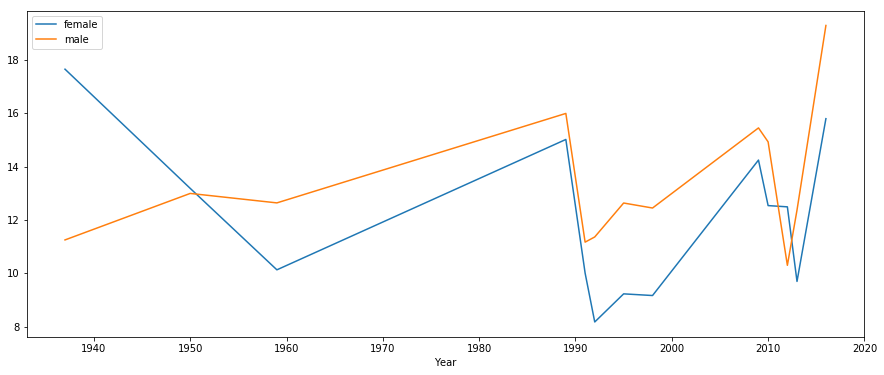

In [29]:
f_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'f']
m_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'm']

f_tok_by_year = f_lines.groupby('Year')["Token_Count"].describe()["mean"]

m_tok_by_year = m_lines.groupby('Year')["Token_Count"].describe()["mean"]  

f_tok_by_year.plot(figsize = (15,6))
m_tok_by_year.plot(figsize = (15,6))
plt.legend(['female', 'male'])
plt.show()                                                                           

## Average Type Count per Line in Each Movie By Gender

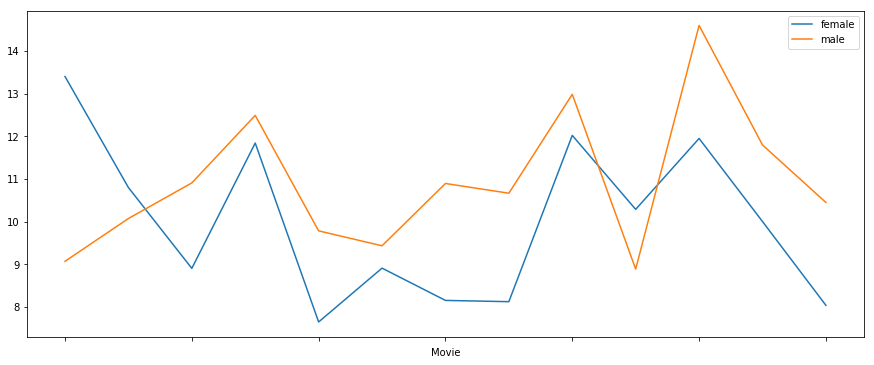

In [30]:
#type counts?
f_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'f']
m_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'm']

f_type_by_year = f_lines.groupby('Movie', sort=False)["Type_Count"].describe()['mean']
m_type_by_year = m_lines.groupby('Movie', sort=False)["Type_Count"].describe()['mean']  

#FIND A WAY TO GET LABELS ON AXES!!!

f_type_by_year.plot(figsize = (15, 6))
m_type_by_year.plot(figsize = (15, 6))
plt.legend(['female', 'male'])
plt.show()

With the exception of Snow White, Cinderella, and Brave, male speakers use a great number of word tokens/types per line. This is interesting line by line, but I eventually also want to look into it OVERALL and by character. I feel that this may be more informative.
Also, this may not be the best visual for these stats. Let's try a bar graph

## Average Token Count/Line by Gender in Each Movie

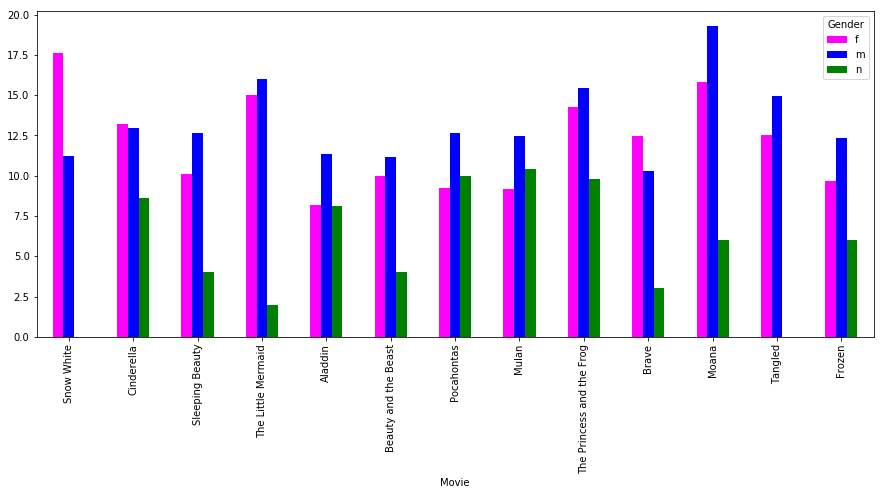

In [31]:
subgroup_2 = disney_df_dialogue.groupby(['Movie','Gender'], sort = False)["Token_Count"].describe()['mean']
subgroup_2.unstack().plot.bar(color=['magenta', 'blue', 'green'], figsize = (15,6))

This is a graph of average token count by gender in each film. (A different visualization of the same stats found in the line plots above)

## Average Type Count/Line by Gender in Each Movie

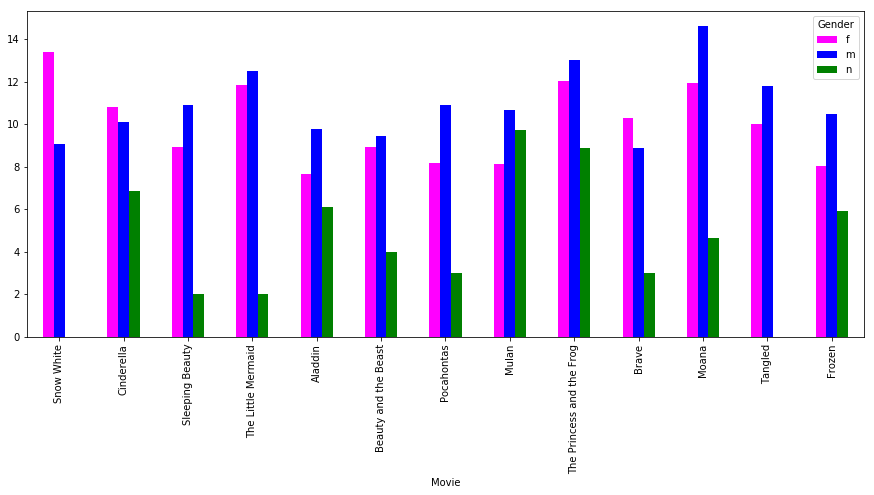

In [32]:
subgroup_3 = disney_df_dialogue.groupby(['Movie','Gender'], sort = False)["Type_Count"].describe()['mean']
subgroup_3.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

In [33]:
#Seeing number of lines by gender for each movie
#aka, total number of lines per gender in each movie
#ex: in Snow White, male characters total 214 of the movie's lines; females utter 123 of all lines
total_lines_per_gen = disney_df_dialogue.groupby(['Movie'], sort=False)['Gender'].value_counts()
total_lines_per_gen

Movie                      Gender
Snow White                 m         214
                           f         123
Cinderella                 f         260
                           m         194
                           n          21
Sleeping Beauty            f         318
                           m         114
                           n           2
The Little Mermaid         m         259
                           f         117
                           n           1
Aladdin                    m         657
                           f         118
                           n          10
Beauty and the Beast       m         436
                           f         199
                           n           3
Pocahontas                 m         365
                           f         190
                           n           1
Mulan                      m         346
                           f         148
                           n          15
The Princess and the Fr

In [34]:
#The total number of female/male characters per movie
num_char_per_gen = disney_df_dialogue.groupby(['Movie', 'Gender'], sort=False)["Speaker"].unique().map(len)

In [35]:
num_char_per_gen

Movie                      Gender
Snow White                 f          2
                           m         13
Cinderella                 f          8
                           n          6
                           m         11
Sleeping Beauty            m          8
                           f          7
                           n          1
The Little Mermaid         m         15
                           f          8
                           n          1
Aladdin                    m         22
                           f          2
                           n          4
Beauty and the Beast       m         18
                           f          8
                           n          2
Pocahontas                 m         13
                           f          3
                           n          1
Mulan                      m         28
                           f          5
                           n          9
The Princess and the Frog  n          8
      

In [36]:
#total number of lines / total number of characters
avg_lines_per_gen = total_lines_per_gen.divide(num_char_per_gen)
# This returns movies in alphabetical order, not chronological order. Need to reindex

In [37]:
avg_lines_per_gen = avg_lines_per_gen.reindex(index = total_lines_per_gen.index)
avg_lines_per_gen

Movie                      Gender
Snow White                 m          16.461538
                           f          61.500000
Cinderella                 f          32.500000
                           m          17.636364
                           n           3.500000
Sleeping Beauty            f          45.428571
                           m          14.250000
                           n           2.000000
The Little Mermaid         m          17.266667
                           f          14.625000
                           n           1.000000
Aladdin                    m          29.863636
                           f          59.000000
                           n           2.500000
Beauty and the Beast       m          24.222222
                           f          24.875000
                           n           1.500000
Pocahontas                 m          28.076923
                           f          63.333333
                           n           1.000000
Mulan 

## Total Lines per Gender in Each Movie

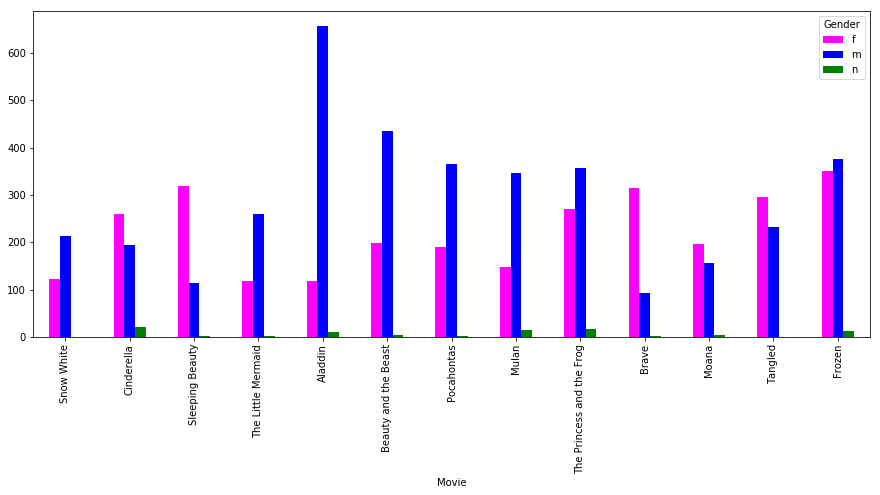

In [38]:
total_lines_per_gen.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15, 6))

Except for Cinderella, Sleeping Beauty, Brave, Moana, and Tangled, overall Male characters have more lines than female characters

## Average Number of Lines per Gender in Each Movie
Here, I divide the total number of lines per gender by the number of male and female characters in each movie, to get the average number of lines uttered by men and women in each movie

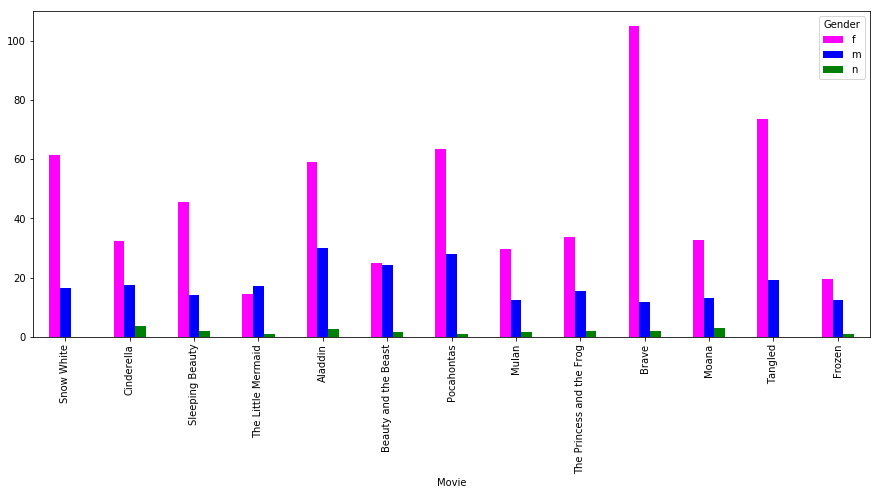

In [39]:
### Oh...interesting....
avg_lines_per_gen.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize=(15,6))

When you take the number of male and female characters into account, you find that on average female characters tend to have more lines. This makes sense--these movies feature main female characters, and several supporting male characters. The only movie with a higher average number of lines for male characters is the Little Mermaid.